<a href="https://colab.research.google.com/github/lailamt/data-mining-matf85/blob/main/Mineracao_LOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MATF85 - Mineração de Dados (2021.2) 
### Discente: Laila Pereira Mota Santos
### Discente: Gabriel Chaves Brito

Dataset: [Link do Kaggle](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min)


#### Informações sobre o Dataset

* `gameId` - Identificador da partida
* `blueWins` - Indica se o time azul ganhou ou perdeu (0 ou 1) 
* `blueWardsPlaced` - Qt. de wards posicionadas do time azul
* `blueWardsDestroyed` - Qt. de wards removidas pelo time azul
* `blueFirstBlood` - Indica se na partida houve first blood (0 ou 1) do time azul
* `blueKills` - Qt. abates do time azul
* `blueDeaths` - Qt. mortes do time azul
* `blueAssists` - Qt. de assistências em abates do time azul
* `blueEliteMonsters` - Qt. de monstros grandes abatidos pelo time azul (Dragons and Heralds. Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team)
* `blueDragons` - Qt. de Dragões abatidos pelo time azul (Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder Dragon) offers a huge advantage to the team)
* `blueHeralds` - Qt. de Arautos abatidos pelo time azul (Elite monster which gives stats bonus when killed by the player. It helps to push a lane and destroys structures)
* `blueTowersDestroyed` - Qt. de torres destruidas pelo time azul (Structures you have to destroy to reach the enemy Nexus. They give gold)
* `blueTotalGold` - Qt. total de gold acumulado pelo time azul
* `blueAvgLevel` - Média do nível do time azul (Champion level. Start at 1. Max is 18. Blue team average champion level)
* `blueTotalExperience` - Somatório da experiência adquirida do time azul
* `blueTotalMinionsKilled` - Qt. de minions abatidos pelo time azul
* `blueTotalJungleMinionsKilled` - Qt. monstros da selva abatidos
* `blueGoldDiff` - Diferença de ouro entre os times
* `blueExperienceDiff` - Diferença de experiência entre os times
* `blueCSPerMin` - Contagem de minions abatidos por minuto do time azul
* `blueGoldPerMin` - Contagem de ouro por minuto do time azul
* `redWardsPlaced` - Qt. de wards posicionadas do time vermelho
* `redWardsDestroyed` - Qt. de wards removidas pelo time vermelho
* `redFirstBlood` - Indica se na partida houve first blood (0 ou 1) do time vermelho
* `redKills` - Qt. abates do time vermelho
* `redDeaths` - Qt. mortes do time vermelho
* `redAssists` - Qt. de assistências em abates do time vermelho
* `redEliteMonsters` - Qt. de monstros grandes abatidos pelo time vermelho (Dragons and Heralds. Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team)
* `redDragons` - Qt. de Dragões abatidos pelo time vermelho (Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder Dragon) offers a huge advantage to the team)
* `redHeralds` - Qt. de Arautos abatidos pelo time vermelho (Elite monster which gives stats bonus when killed by the player. It helps to push a lane and destroys structures)
* `redTowersDestroyed` - Qt. de torres destruidas pelo time vermelho (Structures you have to destroy to reach the enemy Nexus. They give gold)
* `redTotalGold` - Qt. total de gold acumulado pelo time vermelho
* `redAvgLevel` - Média do nível do time vermelho (Champion level. Start at 1. Max is 18. Red team average champion level)
* `redTotalExperience` - Somatório da experiência adquirida do time vermelho
* `redTotalMinionsKilled` - Qt. de minions abatidos pelo time vermelho
* `redTotalJungleMinionsKilled` - Qt. monstros da selva abatidos
* `redGoldDiff` - Diferença de ouro entre os times
* `redExperienceDiff` - Diferença de experiência entre os times
* `redCSPerMin` - Contagem de minions abatidos por minuto do time vermelho
* `redGoldPerMin` - Contagem de ouro por minuto do time vermelho

# Atividade 1

## Inicialização

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

ranked = pd.read_csv('/content/drive/Shareddrives/Mineração-ufba/high_diamond_ranked_10min.csv')
ranked = ranked.drop('gameId', axis=1)
ranked_copy = ranked.copy()
ranked_copy['winner'] = ranked_copy['blueWins'].map({0: 'red', 1: 'blue'}) # adiciona a coluna com a cor do vencedor

In [ ]:
ranked_copy.head(10)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,winner
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7,red
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0,red
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5,red
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8,red
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4,red
5,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1,blue
6,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3,blue
7,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0,red
8,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0,red
9,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5,blue


In [ ]:
ranked.shape

(9879, 39)

In [ ]:
ranked.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
ranked.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [ ]:
tabela = pd.crosstab(ranked['blueWins'], ranked['blueKills'])

In [ ]:
tabela

blueKills,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22
blueWins,,,,,,,,,,,,,,,,,,,,,
0,54,253,460,662,703,752,647,505,377,224,154,86,40,15,10,6,1,0,0,0,0
1,9,60,149,255,483,550,675,633,565,493,373,254,164,132,54,32,29,13,4,2,1


## Gráficos com Plotly

In [ ]:
boxplot_blue_fb_kills = px.box( ranked, 
                               x='blueFirstBlood', 
                               y='blueKills', 
                               width=600, 
                               height=400
                               )
boxplot_blue_fb_kills.show()

In [ ]:
boxplot_red_fb_kills = px.box(ranked, 
                              x='redFirstBlood', 
                              y='redKills', 
                              color_discrete_sequence=['#EF553B'], 
                              width=600, 
                              height=400                              
                              )
boxplot_red_fb_kills.show()

In [ ]:
boxplot_blue_win_kills =px.box(ranked_copy, 
                               x='winner', 
                               y='blueKills', 
                               width=600, 
                               height=400 
                               )
boxplot_blue_win_kills.update_layout(showlegend=False)
boxplot_blue_win_kills.show()


In [ ]:
ranked['blueKills'].describe()

count    9879.000000
mean        6.183925
std         3.011028
min         0.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        22.000000
Name: blueKills, dtype: float64

In [ ]:
hist_blue_kills = px.histogram(ranked, 
                               x='blueKills', 
                               width=600, 
                               height=400
                               )
hist_blue_kills.show()

In [ ]:
ranked['redKills'].describe()

count    9879.000000
mean        6.137666
std         2.933818
min         0.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        22.000000
Name: redKills, dtype: float64

In [ ]:
hist_red_kills = px.histogram(ranked, 
                              x='redKills', 
                              color_discrete_sequence=['#EF553B'], 
                              width=600, 
                              height=400
                              )
hist_red_kills.show()

In [ ]:
ranked['blueWardsPlaced'].describe()

count    9879.000000
mean       22.288288
std        18.019177
min         5.000000
25%        14.000000
50%        16.000000
75%        20.000000
max       250.000000
Name: blueWardsPlaced, dtype: float64

In [ ]:
hist_blue_wards = px.histogram(ranked, 
                               x='blueWardsPlaced', 
                               width=800, 
                               height=400
                               )
hist_blue_wards.show()

In [ ]:
ranked['redWardsPlaced'].describe()

count    9879.000000
mean       22.367952
std        18.457427
min         6.000000
25%        14.000000
50%        16.000000
75%        20.000000
max       276.000000
Name: redWardsPlaced, dtype: float64

In [ ]:
hist_red_wards = px.histogram(ranked, 
                              x='redWardsPlaced', 
                              color_discrete_sequence=['#EF553B'], 
                              width=800, 
                              height=400
                              )
hist_red_wards.show()

In [ ]:
scat_blue_gold_minions = px.scatter(ranked, 
                                    x='blueTotalGold', 
                                    y='blueTotalMinionsKilled', 
                                    width=800, 
                                    height=500
                                    )
scat_blue_gold_minions.show()

In [ ]:
scat_red_gold_minions = px.scatter(ranked,
                                   x='redTotalGold', 
                                   y='redTotalMinionsKilled', 
                                   color_discrete_sequence=['#EF553B'], 
                                   width=800, 
                                   height=500
                                   )
scat_red_gold_minions.show()

In [ ]:
scat_blue_xp_minions = px.scatter(ranked, 
                                  x='blueTotalMinionsKilled', 
                                  y='blueTotalExperience', 
                                  width=800, 
                                  height=500
                                  )
scat_blue_xp_minions.show()

In [ ]:
scat_red_xp_minions = px.scatter(ranked, 
                                 x='redTotalMinionsKilled', 
                                 y='redTotalExperience', 
                                 color_discrete_sequence=['#EF553B'], 
                                 width=800, 
                                 height=500
                                 )
scat_red_xp_minions.show()

In [ ]:
scat_xp_wins = px.scatter(ranked_copy, 
                          x='blueTotalExperience', 
                          y='redTotalExperience', 
                          color='winner', 
                          color_discrete_map={ 
                              "red": '#EF553B', 
                              "blue": '#636EFA' 
                              }, 
                          width=800, 
                          height=500
                          )
scat_xp_wins.show()

## Gráficos com seaborn

In [ ]:
sns.set_color_codes(palette='muted')

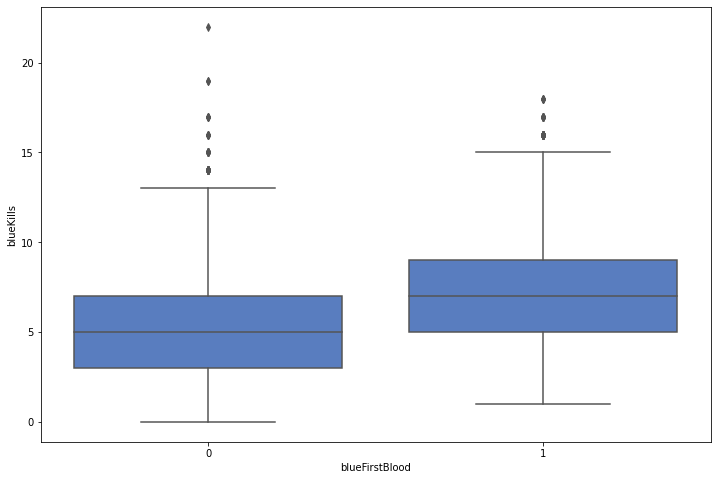

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='blueFirstBlood',y='blueKills', data=ranked, color='b')
plt.show()

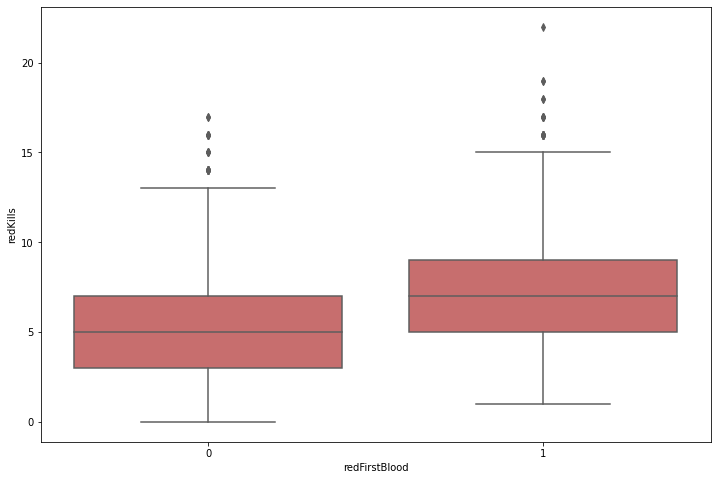

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='redFirstBlood',y='redKills', data=ranked, color='r')
plt.show()

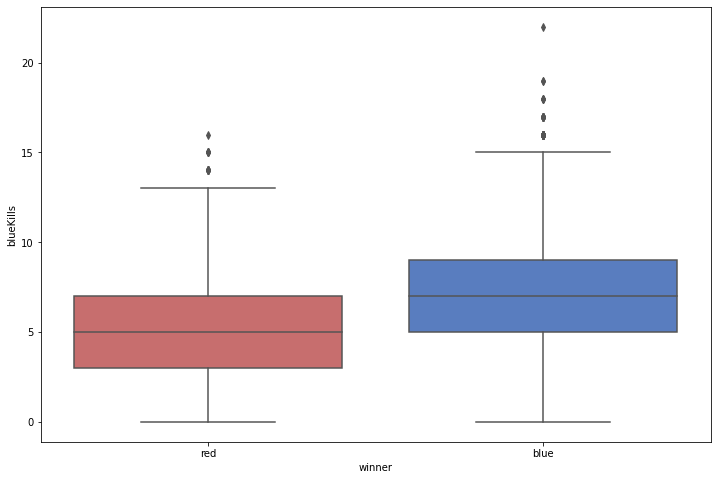

In [ ]:
# Aqui foi usado o ranked-copy apenas pra separar as cores dos times
plt.figure(figsize=(12,8))
my_pal = {"red": "r", "blue": "b"}
sns.boxplot(x='winner',y='blueKills', data=ranked_copy, palette=my_pal)
plt.show()

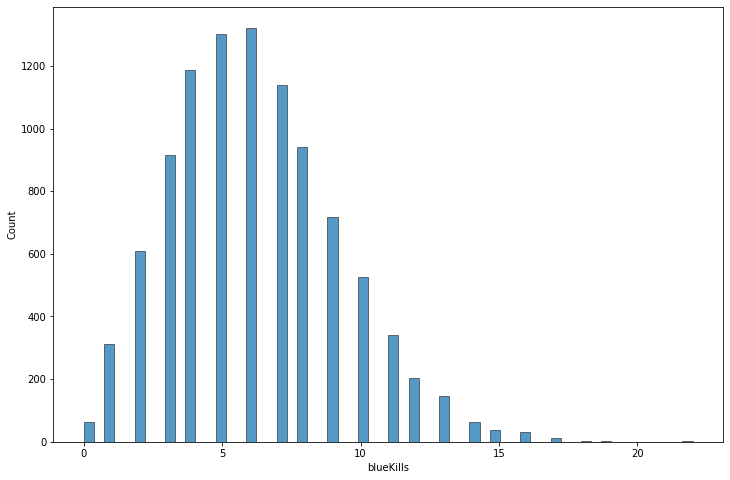

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(
    ranked,
    x="blueKills",
    linewidth=.5
)
plt.show()

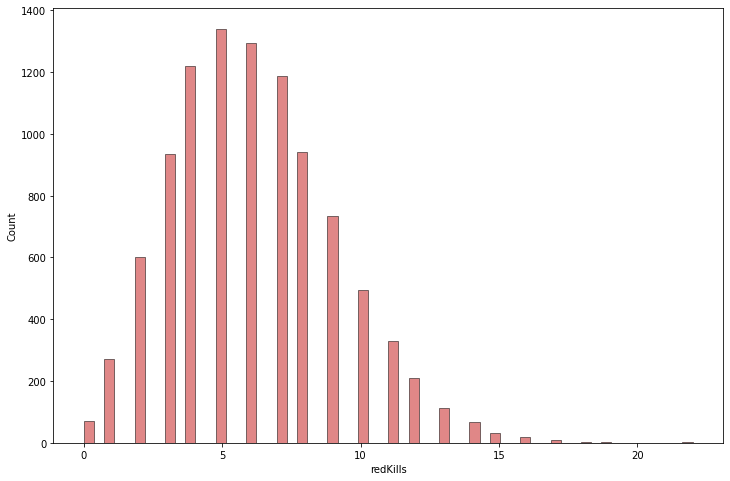

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(
    ranked,
    x="redKills",
    linewidth=.5, color='r'
)
plt.show()

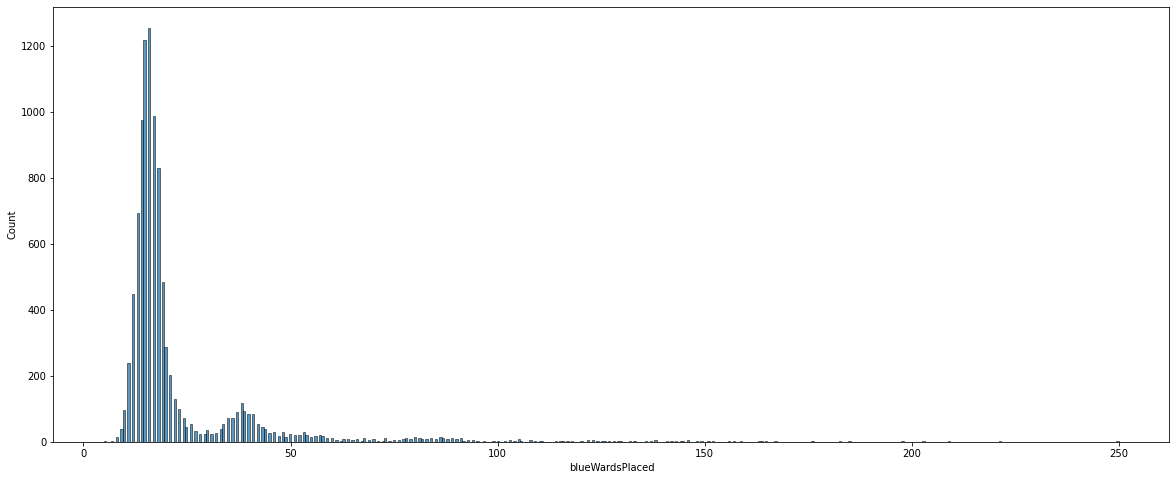

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(
    ranked,
    x="blueWardsPlaced",
    linewidth=.5
)
plt.show()

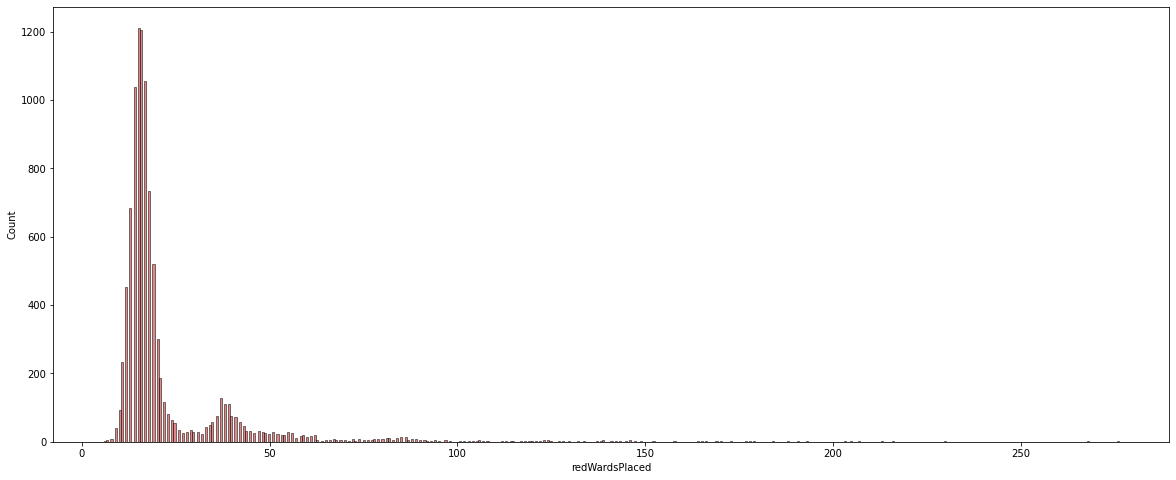

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(
    ranked,
    x="redWardsPlaced",
    linewidth=.5,
    color='r'
)
plt.show()

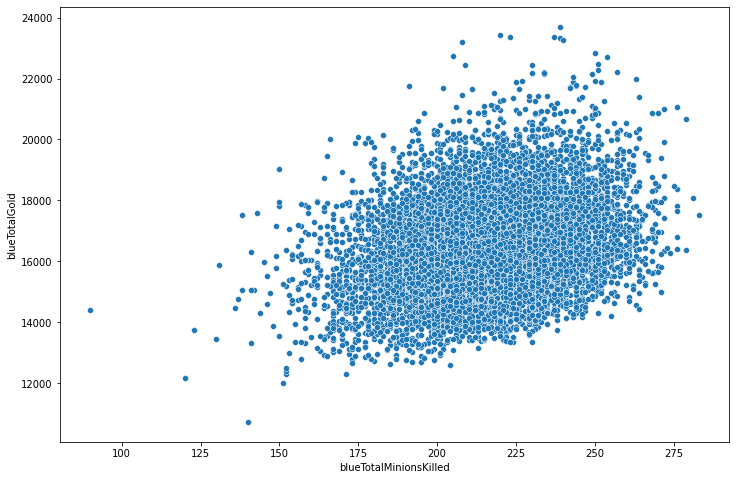

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(y="blueTotalGold", x="blueTotalMinionsKilled",
                linewidth=.5,
                data=ranked)
plt.show()

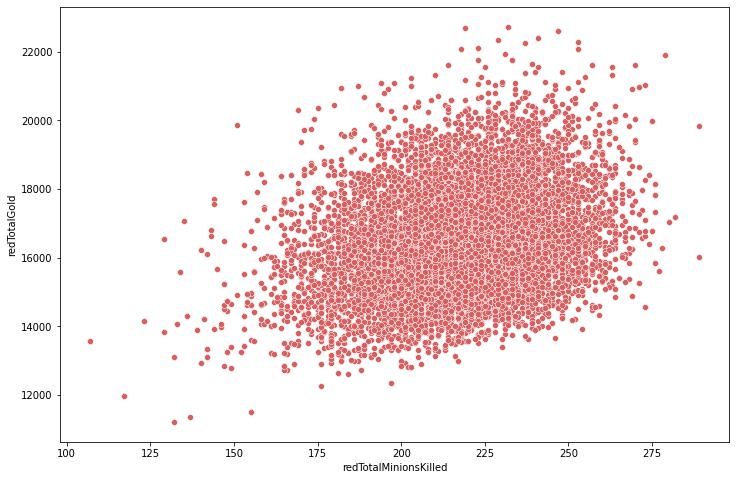

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(y="redTotalGold", x="redTotalMinionsKilled",
                linewidth=.5,
                data=ranked,
                color='r')
plt.show()

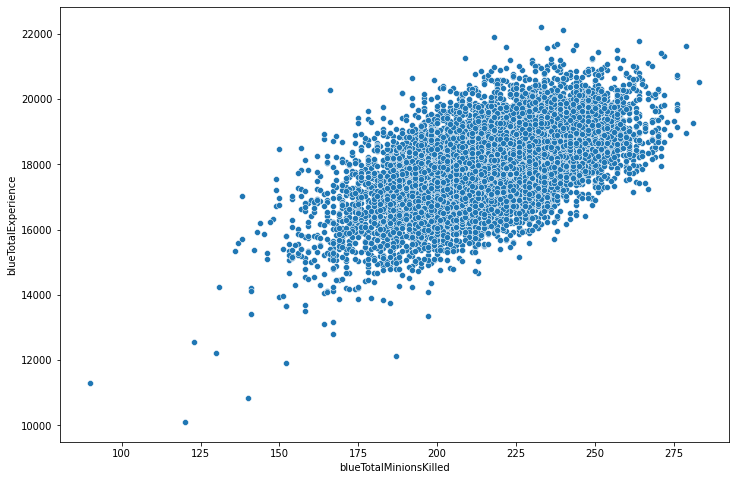

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(y="blueTotalExperience", x="blueTotalMinionsKilled",
                linewidth=.5,
                data=ranked)
plt.show()

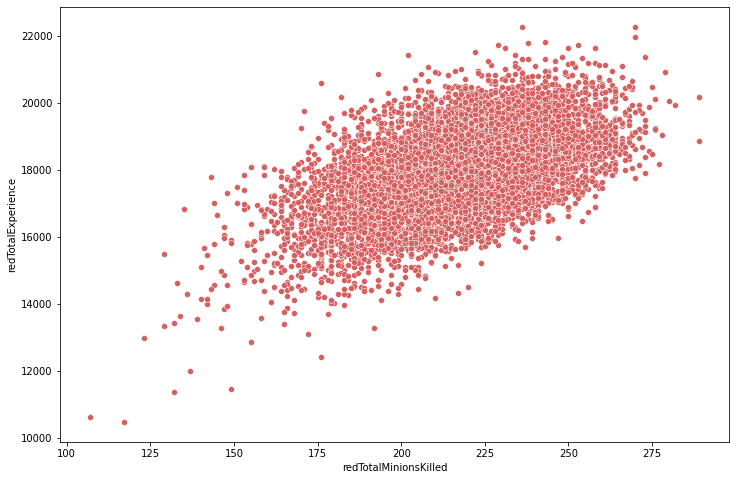

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(y="redTotalExperience", x="redTotalMinionsKilled",
                linewidth=.5,
                data=ranked,
                color='r')
plt.show()

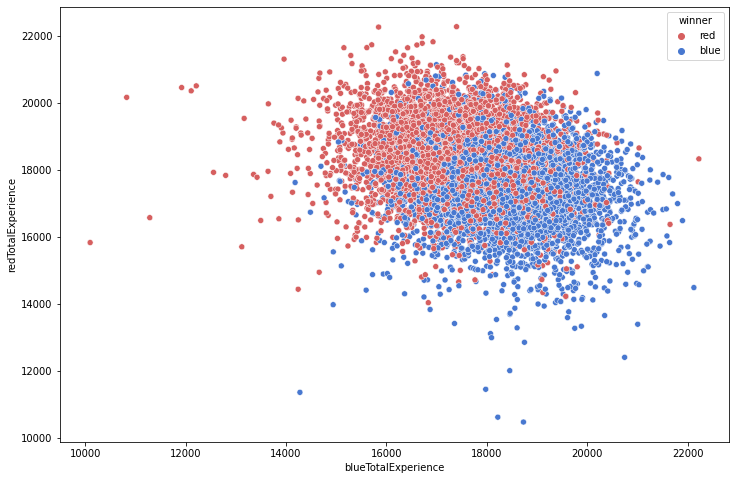

In [ ]:
# Aqui foi usado ranked_copy apenas pra separar as cores e pra legenda
plt.figure(figsize=(12,8))
my_pal = {"red": "r", "blue": "b"}
sns.scatterplot(x="blueTotalExperience", y="redTotalExperience",
                linewidth=.5,
                data=ranked_copy, hue='winner',palette=my_pal)
plt.show()

#Atividade 2

In [ ]:
ranked.shape

(9879, 39)

In [ ]:
ranked.head(10)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [ ]:
ranked.describe().columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [ ]:
# Nossa base de dados não possui valores nulos (NaN)
ranked[pd.isnull(ranked).any(axis=1)].head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin


In [ ]:
# Informações que mostram que nossa base não possui valores nulos
ranked.info()
pd.options.display.max_columns=None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [ ]:
features_blueTeam = ['blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin']
#ranked[features_blueTeam].head()

In [ ]:
features_redTeam = ['redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']
#ranked[features_redTeam].head()

In [ ]:
# Separa o dataset do time Azul
blueTeam = ranked[features_blueTeam]
blueTeam.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


In [ ]:
# Separa o dataset do time Vermelho
redTeam = ranked[features_redTeam]
redTeam.head()

,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
ranked.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
X = ranked.drop('blueWins', axis=1)
Y = ranked['blueWins']

In [ ]:
X.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


##Analisando os dados

In [ ]:
# Unique values
ranked['blueAvgLevel'].unique()

array([6.6, 6.4, 7. , 6.8, 7.2, 7.4, 7.6, 6.2, 7.8, 5.8, 6. , 8. , 5.4,
       5.6, 5.2, 4.8, 4.6])

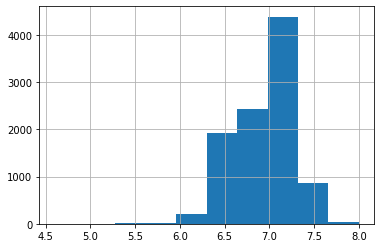

In [ ]:
ranked['blueAvgLevel'].hist()

In [ ]:
ranked['redAvgLevel'].unique()

array([6.8, 7. , 6.4, 6.6, 7.2, 7.4, 6.2, 7.6, 7.8, 5.8, 6. , 5.4, 4.8,
       5.6, 8. , 5. , 8.2, 5.2])

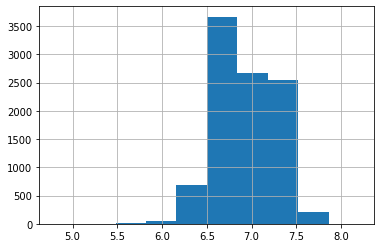

In [ ]:
ranked['redAvgLevel'].hist()

In [ ]:
# Grouping
winner_group = ranked.groupby('blueWins')
winner_group.mean()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueWins,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,22.286725,2.728834,0.404122,5.170135,7.131138,5.522732,0.411396,0.259446,0.151950,0.023237,15864.111134,6.807032,17453.47161,211.793090,49.211154,-1237.066680,-971.898969,21.179309,1586.411113,22.804001,2.841382,0.595878,7.131138,5.170135,7.760558,0.711659,0.516064,0.195595,0.065468,17101.177814,7.032613,18425.370580,221.989089,52.423924,1237.066680,971.898969,22.198909,1710.117781
1,22.289858,2.921298,0.605882,7.201623,5.140365,7.771805,0.689047,0.464909,0.224138,0.079716,17145.263895,7.025396,18404.57789,221.624949,51.813185,1270.718053,908.274442,22.162495,1714.526389,21.930223,2.604462,0.394118,5.140365,7.201623,5.559432,0.434077,0.309736,0.124341,0.020487,15874.545842,6.817606,17496.303448,212.691481,50.197972,-1270.718053,-908.274442,21.269148,1587.454584


##Mapa de Calor entre os atributos

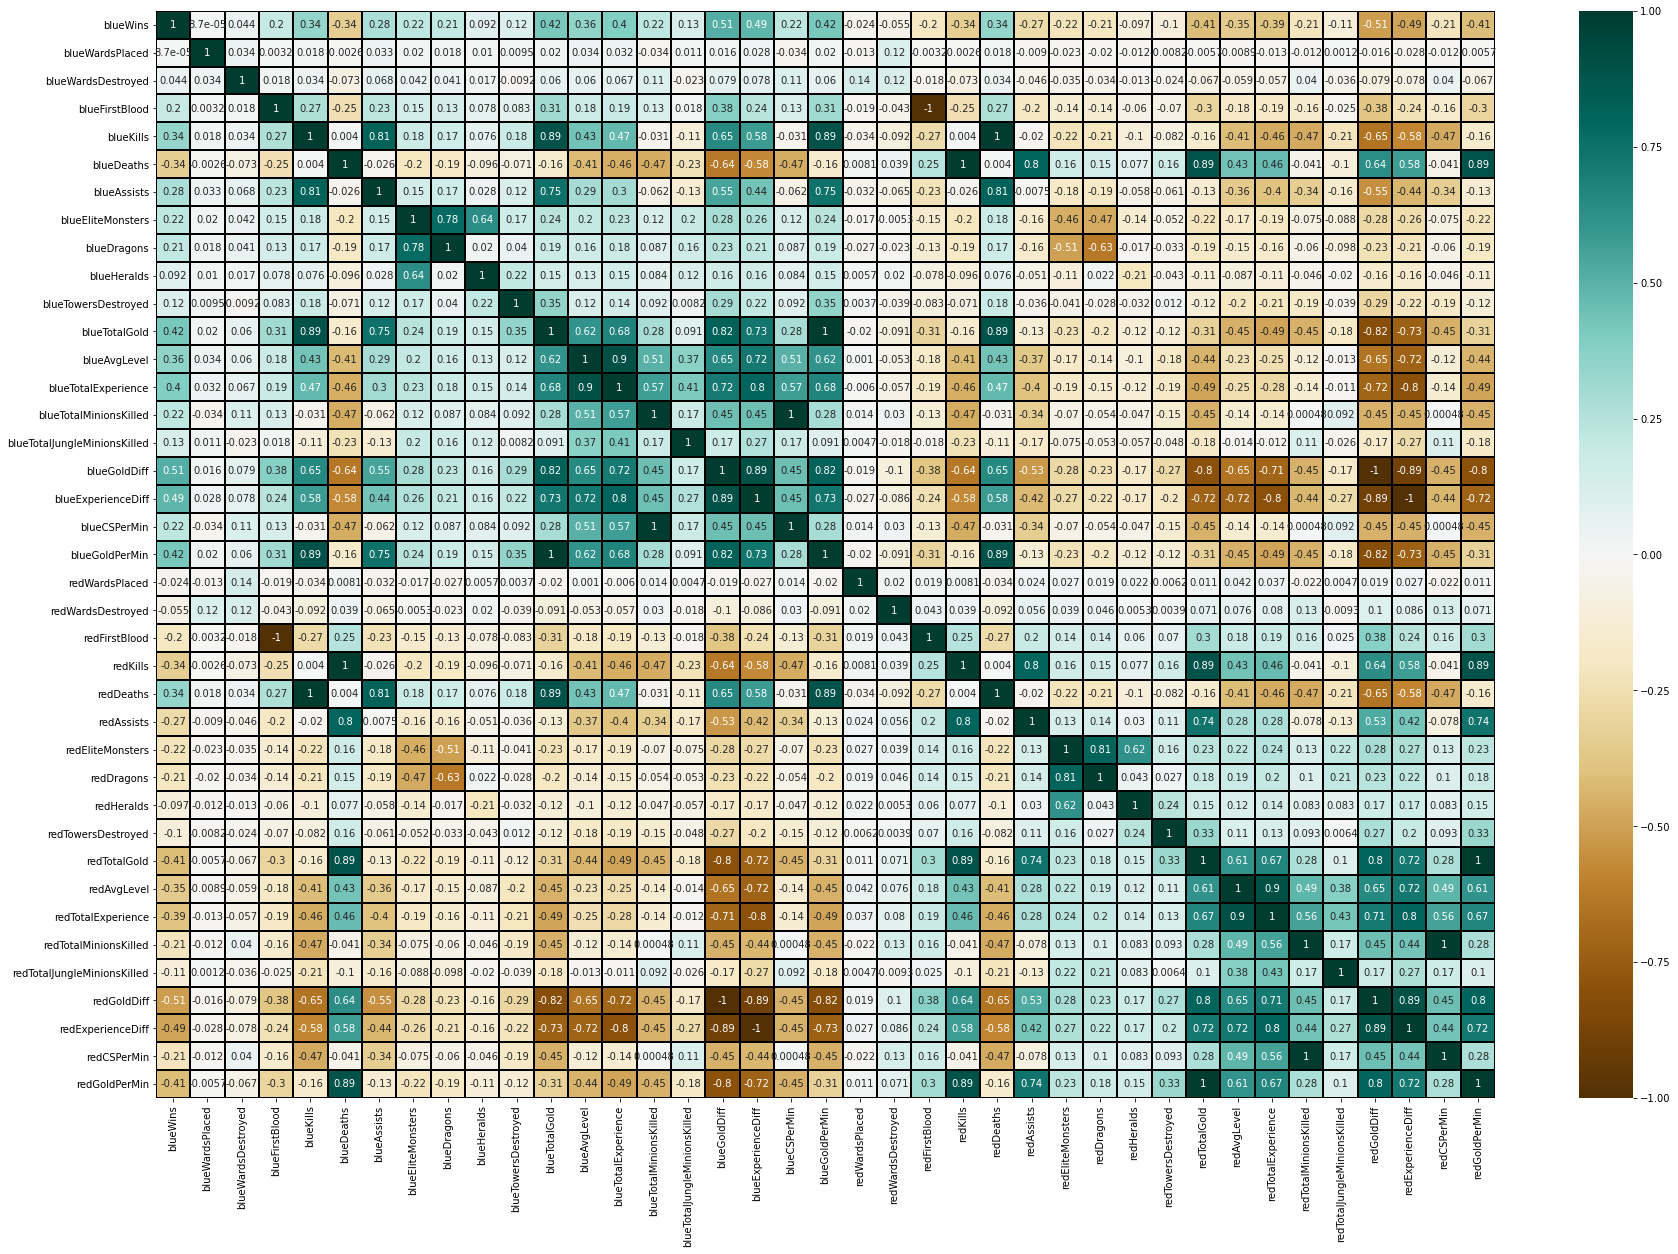

In [ ]:
# Mapa de Calor
plt.figure(figsize=(30, 20))
sns.heatmap(ranked.corr(), 
           xticklabels=ranked.corr().columns.values,
           yticklabels=ranked.corr().columns.values,
           vmin=-1, vmax=1, center= 0, cmap='BrBG', annot = True,
           linewidths=1, linecolor='black'          
           )

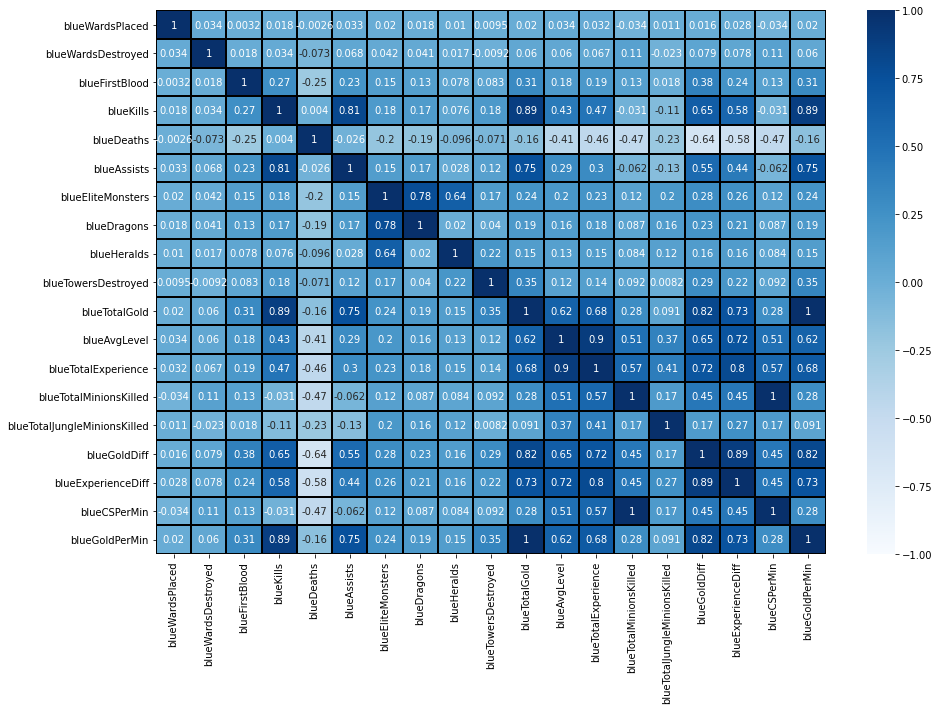

In [ ]:
#Mapa de calor do time azul
plt.figure(figsize=(15, 10))
sns.heatmap(blueTeam.corr(), 
           xticklabels=blueTeam.corr().columns.values,
           yticklabels=blueTeam.corr().columns.values,
           vmin=-1, vmax=1, center= 0, cmap='Blues', annot = True,
           linewidths=1, linecolor='black'          
           )

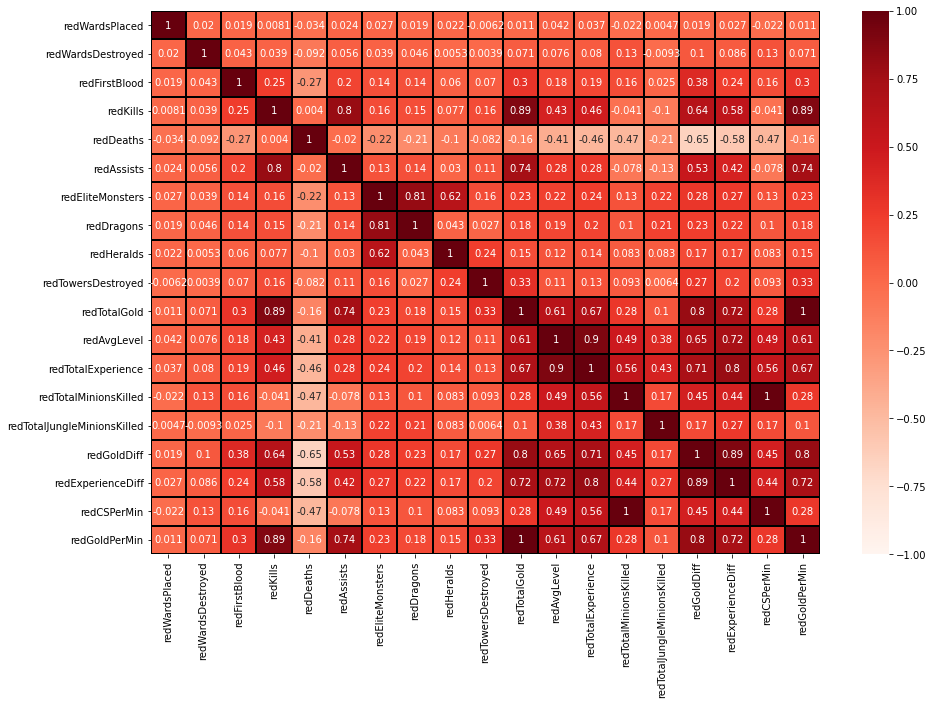

In [ ]:
#Mapa de calor do time vermelho
plt.figure(figsize=(15, 10))
sns.heatmap(redTeam.corr(), 
           xticklabels=redTeam.corr().columns.values,
           yticklabels=redTeam.corr().columns.values,
           vmin=-1, vmax=1, center= 0, cmap='Reds', annot = True,
           linewidths=1, linecolor='black'          
           )

##Matriz de Correlação

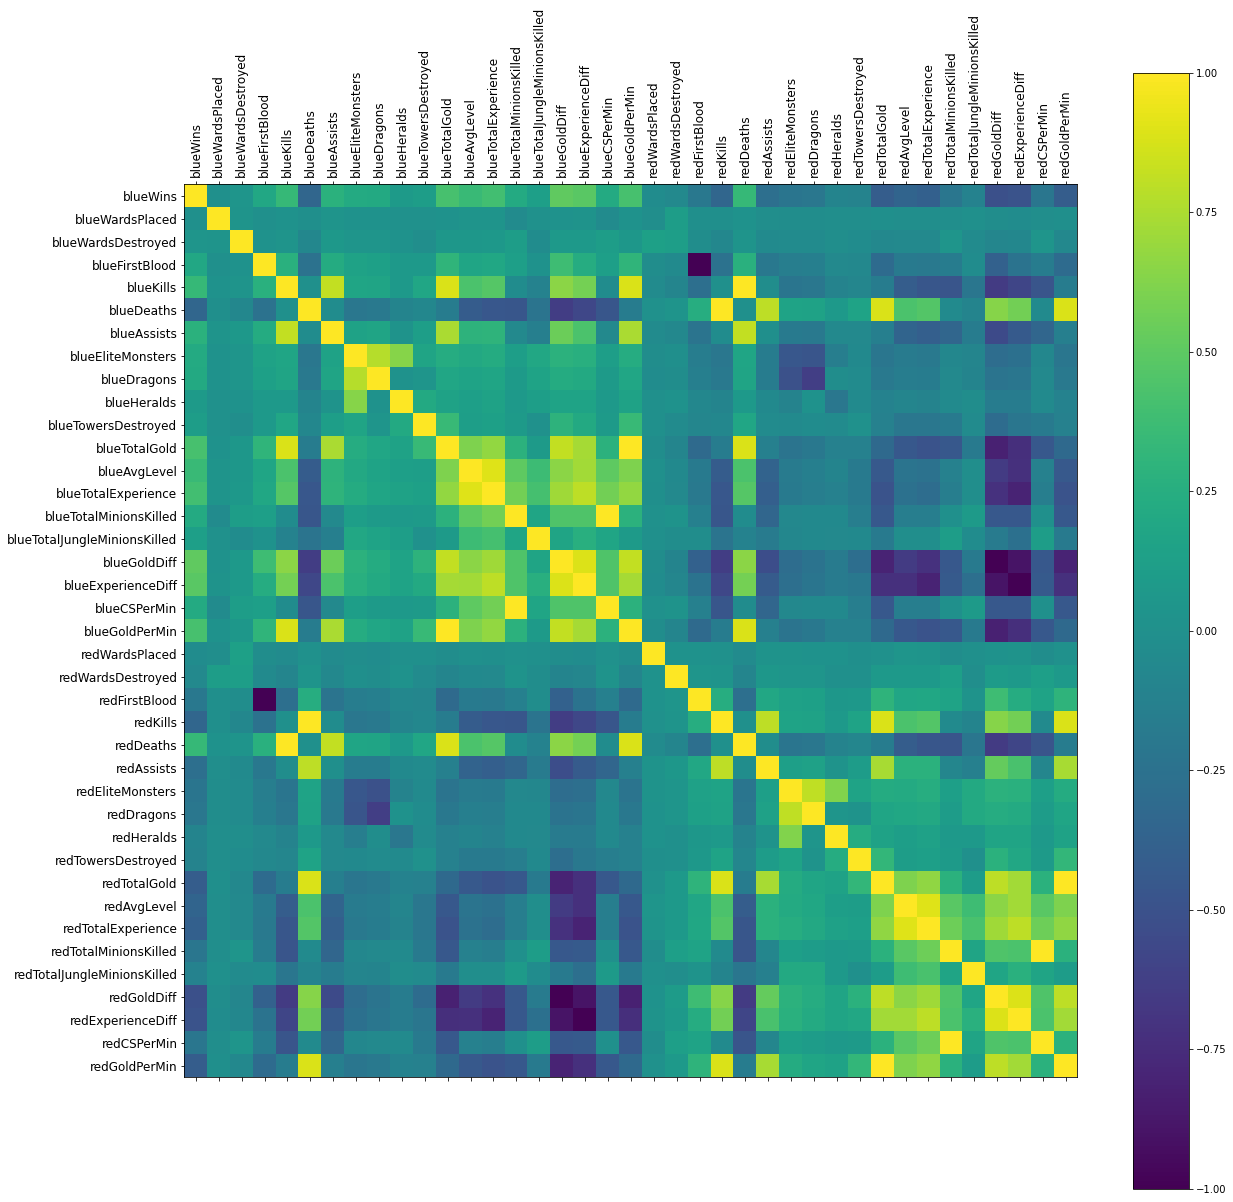

In [ ]:
#Matriz de correlação
f = plt.figure(figsize=(20, 20))
plt.matshow(ranked.corr(),fignum=f.number)
continuous_features = ranked.describe().columns
plt.xticks(range(ranked.select_dtypes(['number']).shape[1]), ranked.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(ranked.select_dtypes(['number']).shape[1]), ranked.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()


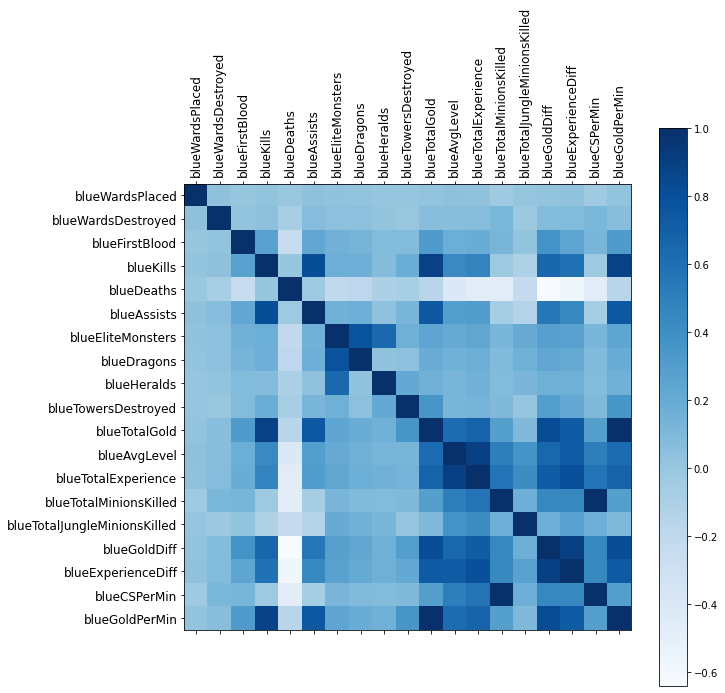

In [ ]:
#Matriz de correlação do time azul
f = plt.figure(figsize=(10, 10))
plt.matshow(blueTeam.corr(),fignum=f.number, cmap='Blues')
continuous_features = blueTeam.describe().columns
plt.xticks(range(blueTeam.select_dtypes(['number']).shape[1]), blueTeam.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(blueTeam.select_dtypes(['number']).shape[1]), blueTeam.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()

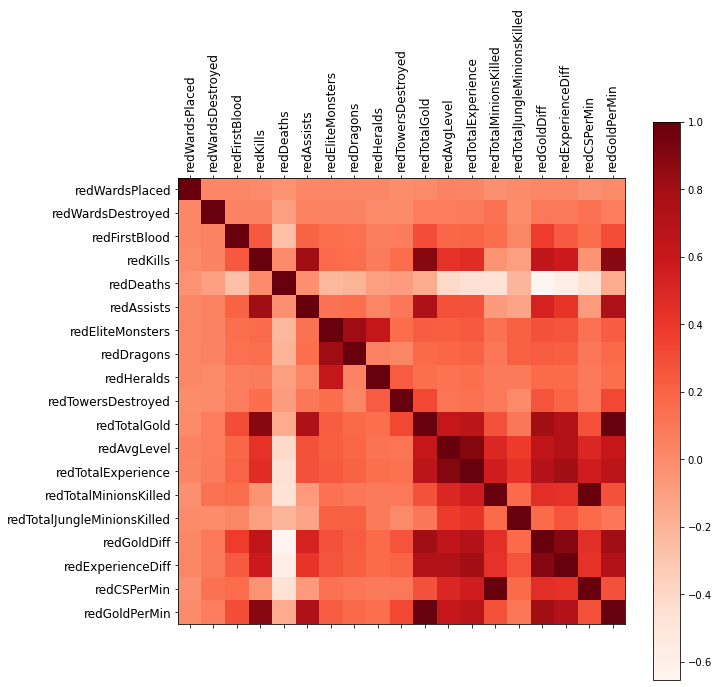

In [ ]:
#Matris de correlação do time vermelho
f = plt.figure(figsize=(10, 10))
plt.matshow(redTeam.corr(),fignum=f.number, cmap='Reds')
continuous_features = redTeam.describe().columns
plt.xticks(range(redTeam.select_dtypes(['number']).shape[1]), redTeam.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(redTeam.select_dtypes(['number']).shape[1]), redTeam.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()

##Salvando em CSV

In [ ]:
# Saving dataframe to CSV
ranked.to_csv('preprocessed_ranked.csv', index=False)